# Project One
#### Derek Caramella
#### DSCC 275: Times Series Analysis & Forecasting
#### Due: 26 October 2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from statsmodels.tsa.api import AR
import warnings
from progressbar import ProgressBar


warnings.filterwarnings('ignore')  # Surpress warnings
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs

<font color='#E43535'>
    <h3>Problem 1</h3>
The data for this project (Problem1_DataSet.csv) represents 7 years of monthly data on airline miles flown in the United Kingdom. You are tasked with the goal of developing a forecasting model that can accurately predict the trend for future years. To achieve the final goal, answer each of the questions below.
</font>

<font color='#E43535'>
1. Create a time series of the plot of the data provided.
</font>

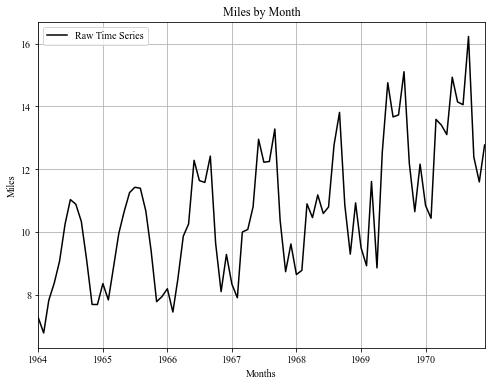

In [2]:
df = pd.read_csv('Problem1_DataSet.csv')
df['Month'] = pd.to_datetime(df['Month'])


fig, ax = plt.subplots(figsize= (8, 6))  # Create empty figure with size
ax.plot(df['Month'],  # x value is time
        df['Miles, in Millions'],  # y value is air value
        color='k',  # line color is black
        label='Raw Time Series')  # Label

ax.margins(x=0)  # ensure plot area is completely used
ax.set_title('Miles by Month')  # Set Title
ax.set_ylabel('Miles')  # Set y tite
ax.set_xlabel('Months')  # Set x title
ax.legend()
plt.show()

<font color='#E43535'>
2.	Plot the autocorrelation function (ACF). From the ACF, what is the seasonal period?
</font>

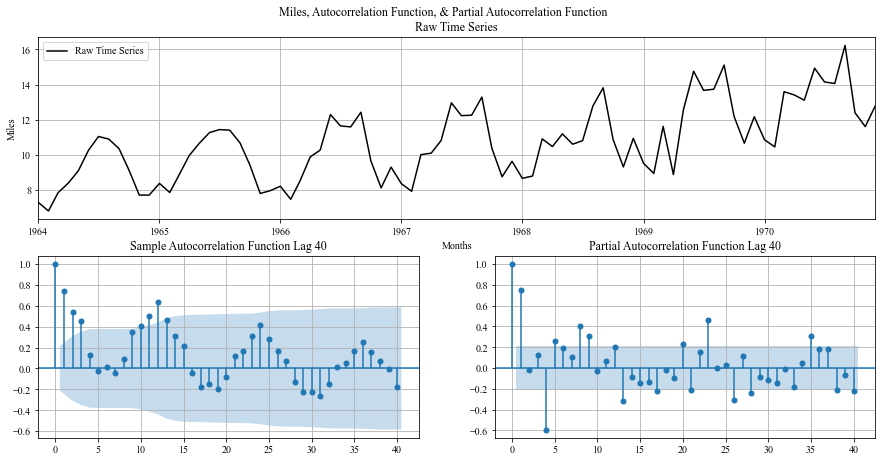

In [3]:
fig = plt.figure(constrained_layout=False, figsize=(15, 7))

spec = fig.add_gridspec(ncols=2, nrows=2)
ax1 = fig.add_subplot(spec[0, 0:2])
ax2 = fig.add_subplot(spec[1, 0])
ax3 = fig.add_subplot(spec[1, 1])

fig.subplots_adjust(top=0.92)
fig.suptitle('Miles, Autocorrelation Function, & Partial Autocorrelation Function')

ax1.plot(df['Month'],  # x value is year
         df['Miles, in Millions'],  # y value is measurement
         color='k',   # line color is black
         label='Raw Time Series')  # Label

ax1.margins(x=0)  # ensure plot area is completely used
ax1.set_title('Raw Time Series')  # Set Title
ax1.set_ylabel('Miles')  # Set y tite
ax1.set_xlabel('Months')  # Set x title

# Plot ACF
plot_acf(df['Miles, in Millions'], lags=40, ax=ax2,
         title='Sample Autocorrelation Function Lag 40')
# Plot PACF
plot_pacf(df['Miles, in Millions'], ax=ax3, lags=40,
          title='Partial Autocorrelation Function Lag 40');

ax1.legend()
plt.show()  # Show figure

The seasonal period is 12 months.

<font color='#E43535'>
3.	Compute a moving average for the data to determine the trend in the data and overlay on the original time-series plot. What is a suitable choice for the moving average window length?
</font>

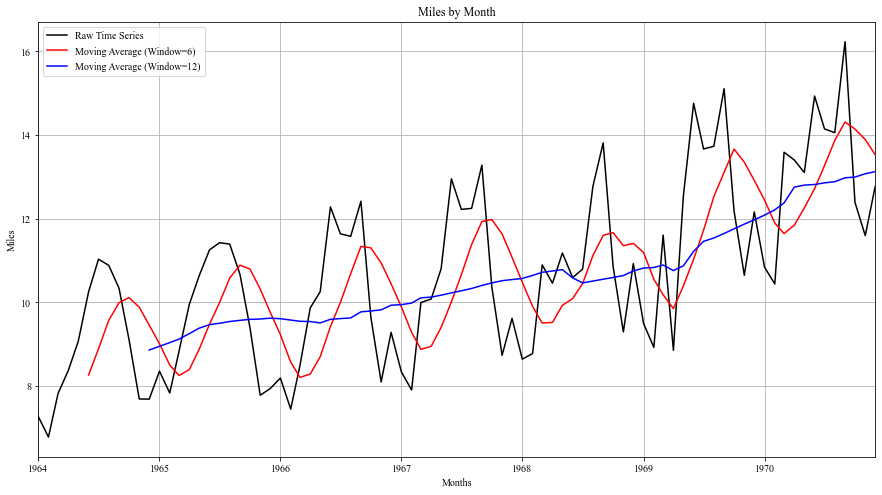

In [4]:
fig, ax = plt.subplots(figsize= (15, 8))  # Create empty figure with size
ax.plot(df['Month'],  # x value is time
        df['Miles, in Millions'],  # y value is air value
        color='k',  # line color is black
        label='Raw Time Series')  # Label
ax.plot(df['Month'],  # x value is time
        df.rolling(window=6).mean()['Miles, in Millions'],  # y value is air value
        color='r',  # line color is black
        label='Moving Average (Window=6)')  # Label
ax.plot(df['Month'],  # x value is time
        df.rolling(window=12).mean()['Miles, in Millions'],  # y value is air value
        color='b',  # line color is black
        label='Moving Average (Window=12)')  # Label

ax.margins(x=0)  # ensure plot area is completely used
ax.set_title('Miles by Month')  # Set Title
ax.set_ylabel('Miles')  # Set y tite
ax.set_xlabel('Months')  # Set x title

ax.legend()
plt.show()

The suitable choice for the moving average window length is 12.

<font color='#E43535'>
4.	Observing the moving average plot in Q3, is the trend line increasing or decreasing?
</font>

With a moving average window of 12, the trend line is increasing.

<font color='#E43535'>
5.	Compute the first difference of the data and plot the ACF and PACF for the differenced data. What are the significant lags based on the ACF and PACF?
</font>

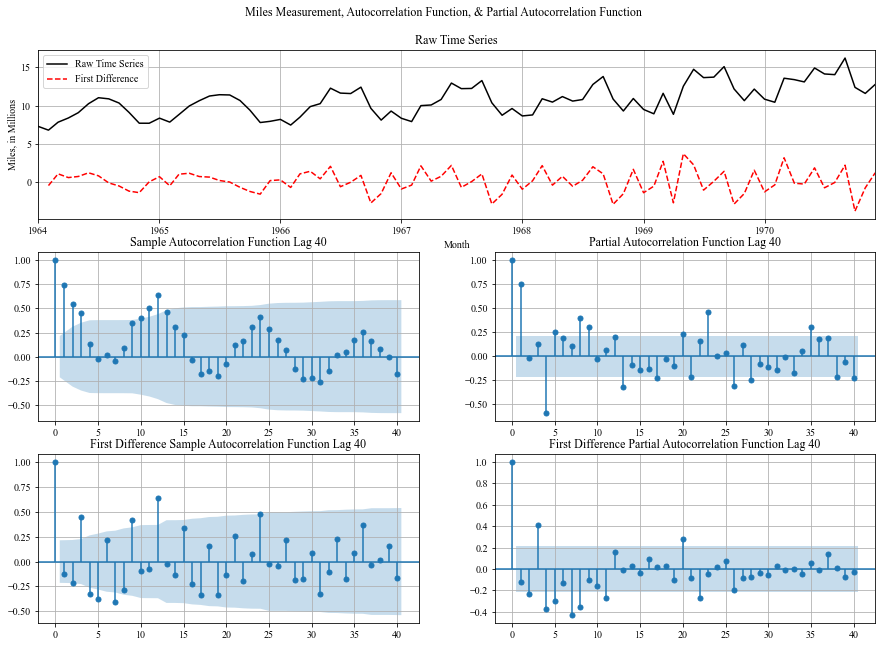

In [5]:
df['First Difference'] = df['Miles, in Millions'].diff(periods=1)


fig = plt.figure(constrained_layout=False, figsize=(15, 10))
spec = fig.add_gridspec(ncols=2, nrows=3)
ax1 = fig.add_subplot(spec[0, 0:2])
ax2 = fig.add_subplot(spec[1, 0])
ax3 = fig.add_subplot(spec[1, 1])
ax4 = fig.add_subplot(spec[2, 0])
ax5 = fig.add_subplot(spec[2, 1])

fig.subplots_adjust(top=0.92)
fig.suptitle('Miles Measurement, Autocorrelation Function, & Partial Autocorrelation Function')

ax1.plot(df['Month'],  # x value is year
         df['Miles, in Millions'],  # y value is measurement
         color='k',   # line color is black
         label='Raw Time Series')  # Label
ax1.plot(df['Month'],  # x value is year
         df['First Difference'],  # y value is measurement
         color='red',   # line color is black
         linestyle='--',  # Set linestyle
         label='First Difference')  # Label

ax1.margins(x=0)  # ensure plot area is completely used
ax1.set_title('Raw Time Series')  # Set Title
ax1.set_ylabel('Miles, in Millions')  # Set y tite
ax1.set_xlabel('Month')  # Set x title

# Plot ACF
plot_acf(df['Miles, in Millions'], lags=40, ax=ax2,
         title='Sample Autocorrelation Function Lag 40')
# Plot PACF
plot_pacf(df['Miles, in Millions'], ax=ax3, lags=40,
          title='Partial Autocorrelation Function Lag 40');

# Plot Differenced ACF
plot_acf(df['First Difference'], lags=40, ax=ax4, missing='drop',
         title='First Difference Sample Autocorrelation Function Lag 40')
# Plot Differenced PACF
plot_pacf(df['First Difference'].iloc[1:], lags=40, ax=ax5, method='ywmle',
          title='First Difference Partial Autocorrelation Function Lag 40')

ax1.legend()
plt.show()  # Show figure

Significant Lags for ACF First Difference: {2, 3, 4, 5, 7, 9, 12}

Significant Lags for PACF First Difference: {2, 3, 4, 5, 7, 8, 11, 20, 22, 26}

<font color='#E43535'>
6.	Using the output from Q5 above, perform a first seasonal difference with the seasonal period you identified in Q2, and plot the ACF and PACF again. What are the significant lags based on the ACF and PACF?
</font>

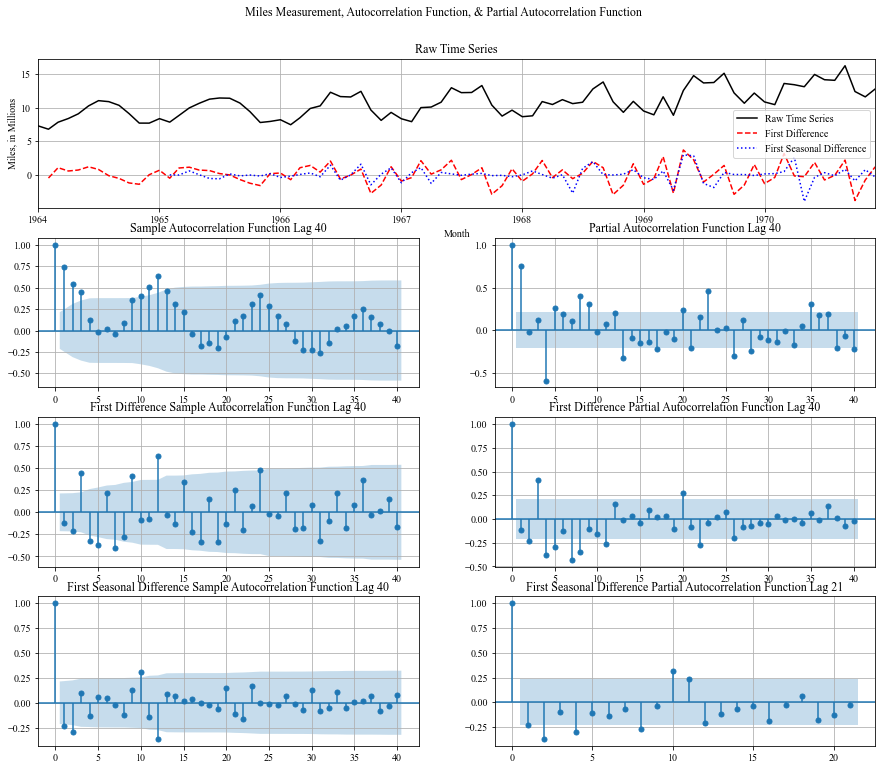

In [6]:
df['First Seasonal Difference'] = df['First Difference'].diff(periods=12)

fig = plt.figure(constrained_layout=False, figsize=(15, 12))
spec = fig.add_gridspec(ncols=2, nrows=4)
ax1 = fig.add_subplot(spec[0, 0:2])
ax2 = fig.add_subplot(spec[1, 0])
ax3 = fig.add_subplot(spec[1, 1])
ax4 = fig.add_subplot(spec[2, 0])
ax5 = fig.add_subplot(spec[2, 1])
ax6 = fig.add_subplot(spec[3, 0])
ax7 = fig.add_subplot(spec[3, 1])

fig.subplots_adjust(top=0.92)
fig.suptitle('Miles Measurement, Autocorrelation Function, & Partial Autocorrelation Function')

ax1.plot(df['Month'],  # x value is year
         df['Miles, in Millions'],  # y value is measurement
         color='k',   # line color is black
         label='Raw Time Series')  # Label
ax1.plot(df['Month'],  # x value is year
         df['First Difference'],  # y value is measurement
         color='red',   # line color is black
         linestyle='--',  # Set linestyle
         label='First Difference')  # Label
ax1.plot(df['Month'],  # x value is year
         df['First Seasonal Difference'],  # y value is measurement
         color='blue',   # line color is black
         linestyle=':',  # Set linestyle
         label='First Seasonal Difference')  # Label

ax1.margins(x=0)  # ensure plot area is completely used
ax1.set_title('Raw Time Series')  # Set Title
ax1.set_ylabel('Miles, in Millions'),  # y value is measurement
ax1.set_xlabel('Month')  # Set x title

# Plot ACF
plot_acf(df['Miles, in Millions'], lags=40, ax=ax2,
         title='Sample Autocorrelation Function Lag 40')
# Plot PACF
plot_pacf(df['Miles, in Millions'], ax=ax3, lags=40,
          title='Partial Autocorrelation Function Lag 40');

# Plot Differenced ACF
plot_acf(df['First Difference'], lags=40, ax=ax4, missing='drop',
         title='First Difference Sample Autocorrelation Function Lag 40')
# Plot Differenced PACF
plot_pacf(df['First Difference'].iloc[1:], lags=40, ax=ax5, method='ywmle',
          title='First Difference Partial Autocorrelation Function Lag 40')
# Plot Seasonal Differenced ACF
plot_acf(df['First Seasonal Difference'], lags=40, ax=ax6, missing='drop',
         title='First Seasonal Difference Sample Autocorrelation Function Lag 40')
# Plot Seasonal Differenced PACF
plot_pacf(df['First Seasonal Difference'].iloc[13:], lags=21, ax=ax7, method='ywmle',
          title='First Seasonal Difference Partial Autocorrelation Function Lag 21')

ax1.legend()
plt.show()  # Show figure

Significant Lags for ACF First Seasonal Difference: {1, 2, 10, 12}

Significant Lags for ACF First Seasonal Difference: {1, 2, 4, 8, 10}

<font color='#E43535'>
7.	Develop a suitable SARIMA model that can be applied on the time series. Use the first 6 years of data only to develop the model.
</font>

In [7]:
train = df[(df['Month'] >= '1964-01-01') & (df['Month'] < '1970-01-01')]

In [8]:
possible_model_orders_unpacked = []
# We want (p, 1, q, P, 1, Q, S).

possible_season_lags = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
possible_model_orders_packed = list(product(product(range(1, 4), repeat=4), possible_season_lags))

for model_order in possible_model_orders_packed:
    d = 1
    D = 1

    order = (model_order[0][0], d, model_order[0][1])
    seasonal_order = model_order[0][2], D, model_order[0][3], model_order[1]
    possible_model_orders_unpacked.append((order, seasonal_order))

In [9]:
sarimax_results = []
bar = ProgressBar()
for model_order in bar(possible_model_orders_unpacked):
    try:
        model = SARIMAX(train['Miles, in Millions'], order=model_order[0], seasonal_order=model_order[1]).fit()
        instance_aic = model.aic
        instance_bic = model.bic
        instance_prediction = model.predict(1, len(train['Miles, in Millions']), typ='levels')
#         instance_sserror = sum((train['Miles, in Millions'][1:].values - instance_prediction[:-1])**2)
        sarimax_results.append((model_order, instance_aic, instance_bic))
    except:
        pass
brute_force_df = pd.DataFrame(sarimax_results, columns=['Model Order', 'AIC', 'BIC'])

100% |########################################################################|


In [10]:
brute_force_df.sort_values(['AIC', 'BIC'], ascending=True).head(3)

,Model Order,AIC,BIC
458,"((2, 1, 3), (1, 1, 1, 12))",149.586552,166.206852
485,"((2, 1, 3), (2, 1, 1, 12))",150.811682,169.509519
467,"((2, 1, 3), (1, 1, 2, 12))",151.216771,169.914608


The suitable SARIMAX model is (2, 1, 3, 1, 1, 1, 12) because the model produces the smallest AIC & BIC.

In [11]:
brute_force_model = SARIMAX(train['Miles, in Millions'], order=(2, 1, 3), seasonal_order=(1, 1, 1, 12)).fit()
brute_force_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                   Miles, in Millions   No. Observations:                   72
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 12)   Log Likelihood                 -66.793
Date:                              Tue, 16 Nov 2021   AIC                            149.587
Time:                                      12:30:15   BIC                            166.207
Sample:                                           0   HQIC                           156.074
                                               - 72                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4706      0.211     -6.961      0.000      -1.885      -1.057
ar.L2         -0.4925      0.229     -2.151      0.031      -0.941      -0.044
ma.L1          1.1063      0.667      1.658      0.097      -0.202       2.414
ma.L2         -0.6712      0.353     -1.903      0.057      -1.363       0.020
ma.L3         -0.8401      0.487     -1.725      0.084      -1.795       0.114
ar.S.L12      -0.3493      0.635     -0.550      0.582      -1.595       0.896
ma.S.L12      -0.0930      0.643     -0.145      0.885      -1.354       1.168
sigma2         0.5055      0.342      1.480      0.139      -0.164       1.175
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                19.69
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color='#E43535'>
8. Use the model parameters determined in Q7 above to forecast for the 7th year. Compare the forecast with actual values. Comment on your observations.
</font>

In [12]:
brute_force_forecast = brute_force_model.get_forecast(steps=12)
brute_force_forecast_means = brute_force_forecast.predicted_mean
brute_force_forecast_conf_intervals = brute_force_forecast.conf_int()

In [13]:
df = pd.merge(df, train['Miles, in Millions'], right_index=True, left_index=True, 
             how='outer', suffixes=('_actual', '_train'))
df = pd.merge(df, brute_force_forecast_means, right_index=True, left_index=True,
              how='outer')
df = pd.merge(df, brute_force_forecast_conf_intervals, right_index=True, left_index=True,
              how='outer')

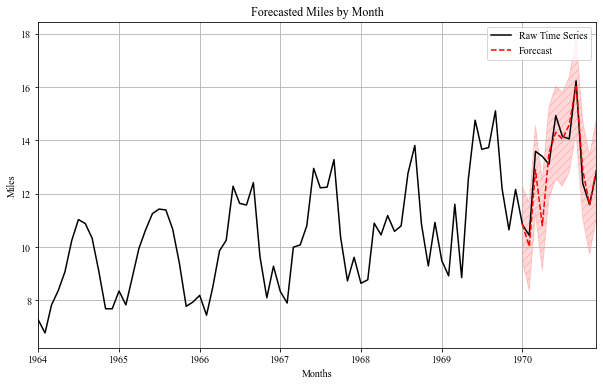

In [14]:
fig, ax = plt.subplots(figsize= (10, 6))  # Create empty figure with size

ax.plot(df['Month'],  # x value is year
        df['Miles, in Millions_actual'],  # y value is measurement
        color='k',   # line color is black
        label='Raw Time Series')  # Label
ax.plot(df['Month'],  # x value is year
        df['predicted_mean'],  # y value is measurement
        color='red', 
        linestyle='--',   # line color is black
        label='Forecast')  # Label
ax.fill_between(df['Month'],
                df['lower Miles, in Millions'],
                df['upper Miles, in Millions'],
                color='red', hatch = '///', alpha=0.15)

ax.margins(x=0)  # ensure plot area is completely used
ax.set_title('Forecasted Miles by Month')  # Set Title
ax.set_ylabel('Miles')  # Set y tite
ax.set_xlabel('Months')  # Set x title

ax.legend()
plt.show()

The forecasted values provide a relatively good fit for the model; however, some data fluctuations are exaggerated, for example in the spring on 1970, the raw data dips, but forecasted data dips more extremely. But from the middle of 1970 to the end of year, the model fit the raw data well. 

<font color='#E43535'>
<h2>Problem 2</h2>
In this problem, you will develop a time-series model to analyze Wine consumption from the data file “TotalWine.csv”.
</font>

<font color='#E43535'>
a)	Plot the time series for TotalWine. What is the seasonal period for this time-series?
</font>

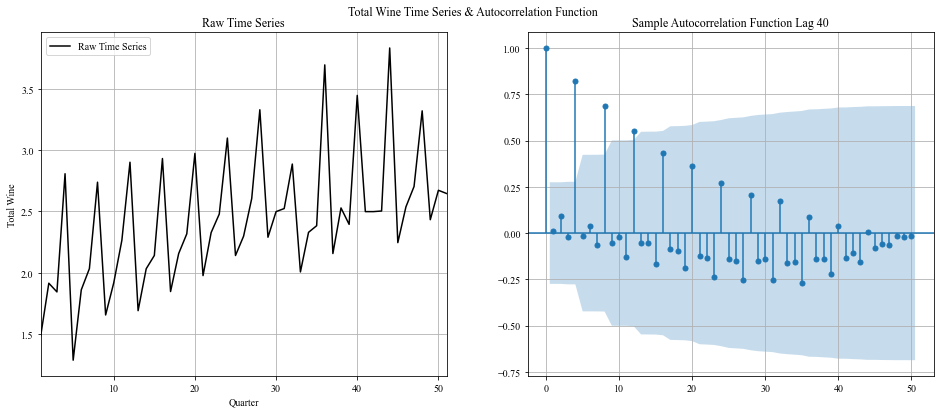

In [15]:
wine_df = pd.read_csv('TotalWine.csv')

fig = plt.figure(constrained_layout=False, figsize=(16, 6))
spec = fig.add_gridspec(ncols=2, nrows=1)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])


fig.subplots_adjust(top=0.92)
fig.suptitle('Total Wine Time Series & Autocorrelation Function')

ax1.plot(wine_df['Time (Quarter)'],  # x value is time
         wine_df['TotalWine'],  # y value is air value
         color='k',  # line color is black
         label='Raw Time Series')  # Label

ax1.margins(x=0)  # ensure plot area is completely used
ax1.set_title('Raw Time Series')  # Set Title
ax1.set_ylabel('Total Wine'),  # y value is measurement
ax1.set_xlabel('Quarter')  # Set x title

# Plot ACF
plot_acf(wine_df['TotalWine'], lags=50, ax=ax2,
         title='Sample Autocorrelation Function Lag 40')

ax1.legend()
plt.show()  # Show figure

The seasonal period is every 4 quarters.

<font color='#E43535'>
b)	Apply seasonal differencing to the original time-series. Vary the difference lag from 1, 2, 4, 6. Plot the result for each of these lags. Which of these differences is most suitable to remove the seasonality?
</font>

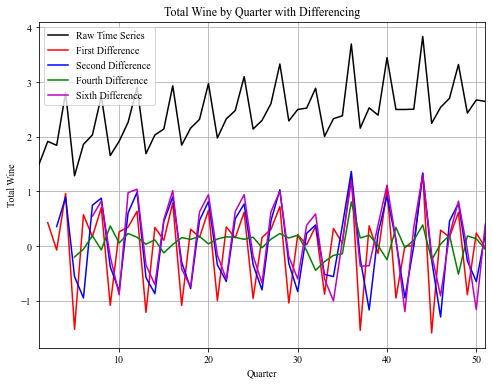

In [16]:
wine_df['First Difference'] = wine_df['TotalWine'].diff(periods=1)
wine_df['Second Difference'] = wine_df['TotalWine'].diff(periods=2)
wine_df['Fourth Difference'] = wine_df['TotalWine'].diff(periods=4)
wine_df['Sixth Difference'] = wine_df['TotalWine'].diff(periods=6)


fig, ax = plt.subplots(figsize= (8, 6))  # Create empty figure with size
ax.plot(wine_df['Time (Quarter)'],  # x value is time
        wine_df['TotalWine'],  # y value is air value
        color='k',  # line color is black
        label='Raw Time Series')  # Label

ax.plot(wine_df['Time (Quarter)'],  # x value is time
        wine_df['First Difference'],  # y value is air value
        color='r',
        label='First Difference')  # Label

ax.plot(wine_df['Time (Quarter)'],  # x value is time
        wine_df['Second Difference'],  # y value is air value
        color='b',
        label='Second Difference')  # Label

ax.plot(wine_df['Time (Quarter)'],  # x value is time
        wine_df['Fourth Difference'],  # y value is air value
        color='g',
        label='Fourth Difference')  # Label

ax.plot(wine_df['Time (Quarter)'],  # x value is time
        wine_df['Sixth Difference'],  # y value is air value
        color='m',
        label='Sixth Difference')  # Label

ax.margins(x=0)  # ensure plot area is completely used
ax.set_title('Total Wine by Quarter with Differencing')  # Set Title
ax.set_ylabel('Total Wine')  # Set y tite
ax.set_xlabel('Quarter')  # Set x title
ax.legend()
plt.show()  # Show figure

The 4<sup>th</sup> difference is most suitable to remove the seasonality.

<font color='#E43535'>
c)	Compute and plot the Auto-correlation (ACF) function for the original time-series. What is the seasonal period you estimate from the ACF?
</font>

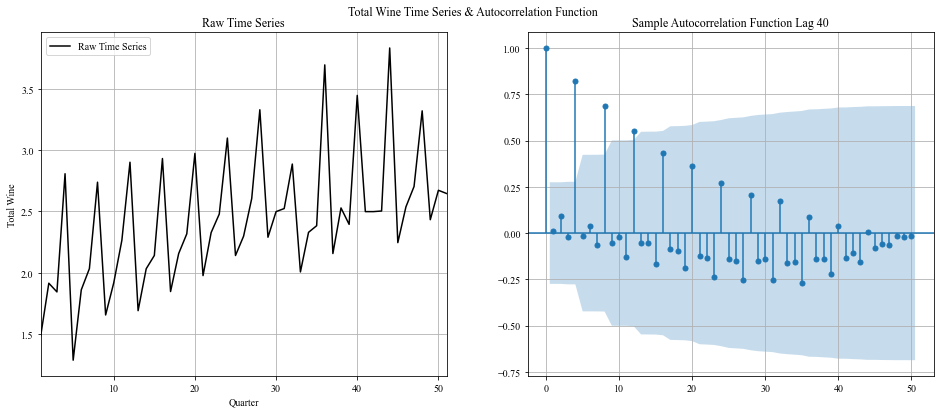

In [17]:
fig = plt.figure(constrained_layout=False, figsize=(16, 6))
spec = fig.add_gridspec(ncols=2, nrows=1)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])


fig.subplots_adjust(top=0.92)
fig.suptitle('Total Wine Time Series & Autocorrelation Function')

ax1.plot(wine_df['Time (Quarter)'],  # x value is time
         wine_df['TotalWine'],  # y value is air value
         color='k',  # line color is black
         label='Raw Time Series')  # Label

ax1.margins(x=0)  # ensure plot area is completely used
ax1.set_title('Raw Time Series')  # Set Title
ax1.set_ylabel('Total Wine'),  # y value is measurement
ax1.set_xlabel('Quarter')  # Set x title

# Plot ACF
plot_acf(wine_df['TotalWine'], lags=50, ax=ax2,
         title='Sample Autocorrelation Function Lag 40')

ax1.legend()
plt.show()  # Show figure

The seasonal period is every 4 quarters.

<font color='#E43535'>
d)	Define an AR model using tsa.AR available in statsmodels.api. Determine the optimal order using the “select_order” function. You will need to specify a maximum order p (recommend p=10) to consider and a criterion for deciding which model order is "best". [e.g. You can use AIC as the model selection criteria]
</font>

In [18]:
optimal_lag = AR(wine_df['Fourth Difference'], missing='drop').select_order(10, ic='aic', trend='c')
optimal_lag

5

The optimal lag is 5.

<font color='#E43535'>
e)	Now, evaluate an AR(p) model for the time-series generated after seasonal differencing (using the best lag you found in part b above).
</font>

<font color='#E43535'>
&nbsp; i. Use the fit method specifying the optimal lag found above.
</font>

In [19]:
wine_df['First Seasonal Difference'] = wine_df['TotalWine'].diff(periods=4)
model = AR(wine_df['First Seasonal Difference'], missing='drop').fit(max_lag=optimal_lag, ic='aic')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      F  -                  i                  r
Model:                          AR(4)   Log Likelihood                  15.286
Method:                          cmle   S.D. of innovations              0.170
Date:                Tue, 16 Nov 2021   AIC                             -3.270
Time:                        12:30:19   BIC                             -3.024
Sample:                             0   HQIC                            -3.179
                                                                              
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1189      0.033      3.619      0.000       0.055       0.183
L1.First Seasonal Difference    -0.0033      0.123     -0.027      0.979      -0.244       0.238
L2.First Seasonal Difference     0.0507      0.123      0.413      0.679      -0.190       0.291
L3.First Seasonal Difference     0.0526      0.123      0.429      0.668      -0.188       0.293
L4.First Seasonal Difference    -0.6934      0.131     -5.291      0.000      -0.950      -0.437
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7680           -0.7622j            1.0820           -0.3756
AR.2           -0.7680           +0.7622j            1.0820            0.3756
AR.3            0.8059           -0.7630j            1.1098           -0.1207
AR.4            0.8059           +0.7630j            1.1098            0.1207
-----------------------------------------------------------------------------
"""

<font color='#E43535'>
&nbsp; ii. Use the predict method to generate values starting at the optimal lag.
</font>

In [20]:
wine_df_predicted = list(model.predict())
wine_df_predicted

[0.2639212679171852,
 0.16161415870786797,
 0.0020566012331390236,
 0.1882739122188956,
 -0.12279546892267727,
 0.09967258592453761,
 -0.03131740782426995,
 0.01395450606108459,
 0.0942834731678811,
 0.03364428138537421,
 0.21396820243699918,
 0.11200531875024947,
 0.0260857124364828,
 0.04392109738904354,
 0.004402842880924053,
 0.10475506880473533,
 0.04549997050884256,
 0.014588395722852128,
 0.02224561418807664,
 0.038951454506197476,
 0.009334986545470488,
 0.15691488971461823,
 0.049878117315423354,
 -0.023031219680273194,
 0.023391893827903878,
 -0.045642843030133176,
 0.13866967851838463,
 0.40309718539578254,
 0.296483584600587,
 0.26928502883380173,
 0.2654618925490415,
 -0.42413756271584485,
 0.026725225478398822,
 -0.03227750243092713,
 0.11563481498127318,
 0.30765934775697273,
 -0.1155755869130243,
 0.16590355283228533,
 0.050692864893457555,
 -0.16143789205424156,
 0.3082267788771,
 0.07572148470852556,
 -0.037710307498004775]

<font color='#E43535'>
&nbsp; iii.	Plot the predicted results and the corresponding seasonally differenced time-series
</font>

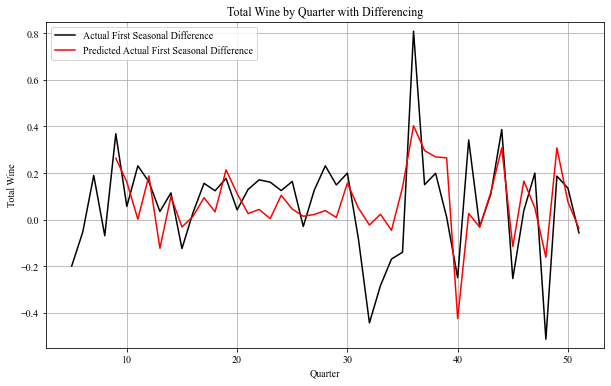

In [21]:
fig, ax = plt.subplots(figsize= (10, 6))  # Create empty figure with size
ax.plot(wine_df['Time (Quarter)'],  # x value is time
        wine_df['First Seasonal Difference'],  # y value is air value
        color='k',  # line color is black
        label='Actual First Seasonal Difference')  # Label

ax.plot(wine_df['Time (Quarter)'][min(model.predict().index):],  # I used the minimum index of the predicted series
        model.predict(),  # y value is air value
        color='r',
        label='Predicted Actual First Seasonal Difference')  # Label

ax.set_title('Total Wine by Quarter with Differencing')  # Set Title
ax.set_ylabel('Total Wine')  # Set y tite
ax.set_xlabel('Quarter')  # Set x title
ax.legend()
ax.set_ylim([-0.55, 0.85])
plt.show()

<font color='#E43535'>
&nbsp; iv. Calculate the Mean Absolute Error (MAE) by comparing the predicted results with the seasonally differenced data.
</font>

In [22]:
prediction_less_actual = []
for k in range(min(model.predict().index), len(wine_df)):
    actual = wine_df['First Seasonal Difference'].iloc[k]
    predicted = wine_df_predicted[k - min(model.predict().index)]
    prediction_less_actual.append(abs(predicted - actual))
sum(prediction_less_actual)

5.735340146345437